In [16]:
from Logger import Logger

logger = Logger()

logger.start_session(subject="MFI", session="Afternoon")


The available subjects are: ['MFI', 'Valuation', 'IB']


The available sessions are: ['Morning', 'Afternoon', 'Evening']


Study session started at 16:01:26


Studying for: 00:00:00	Time spent studying today: 04:15:07

Studying for: 00:32:55	Time spent studying today: 04:48:02

In [17]:
while True:
    continue

Studying for: 01:03:12	Time spent studying today: 05:18:19

KeyboardInterrupt: 

Studying for: 01:03:14	Time spent studying today: 05:18:21

In [14]:
#logger.abort_session()

In [18]:
logger.end_session()

Study session ended at 17:04:41
{'day': datetime.date(2025, 1, 17), 'start_time': datetime.datetime(2025, 1, 17, 16, 1, 26, 592735), 'end_time': datetime.datetime(2025, 1, 17, 17, 4, 41, 367698), 'total_time': datetime.timedelta(seconds=3794, microseconds=774963), 'session': 'Afternoon', 'subject': 'MFI'}
File saved at: ./Logs/study_sessions.csv


In [5]:
df_today = logger._today_stats()

time_today = df_today["total_time"].sum()

pandas._libs.tslibs.timedeltas.Timedelta

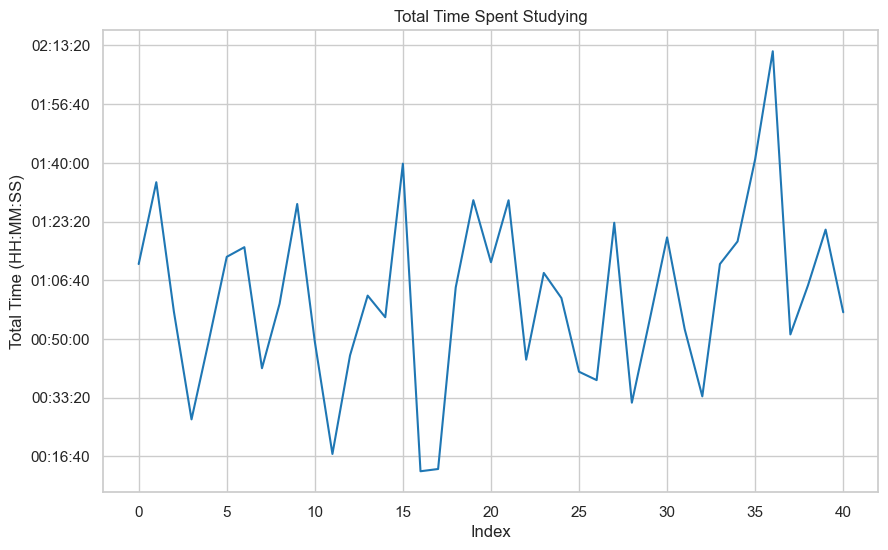

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set_context("notebook")  # You can choose 'paper', 'notebook', 'talk', or 'poster'
sns.set_style("whitegrid")

df_ex = logger._open_log()


# Assuming df_ex is your DataFrame
df_ex['total_time_seconds'] = df_ex['total_time'].dt.total_seconds()

# Function to convert seconds to HH:MM:SS format
def seconds_to_hms(x, pos):
    hours, remainder = divmod(int(x), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{hours:02}:{minutes:02}:{seconds:02}'

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ex, x=df_ex.index, y="total_time_seconds")

# Format the y-axis to show time in HH:MM:SS
formatter = FuncFormatter(seconds_to_hms)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Index')
plt.ylabel('Total Time (HH:MM:SS)')
plt.title('Total Time Spent Studying')
plt.show()

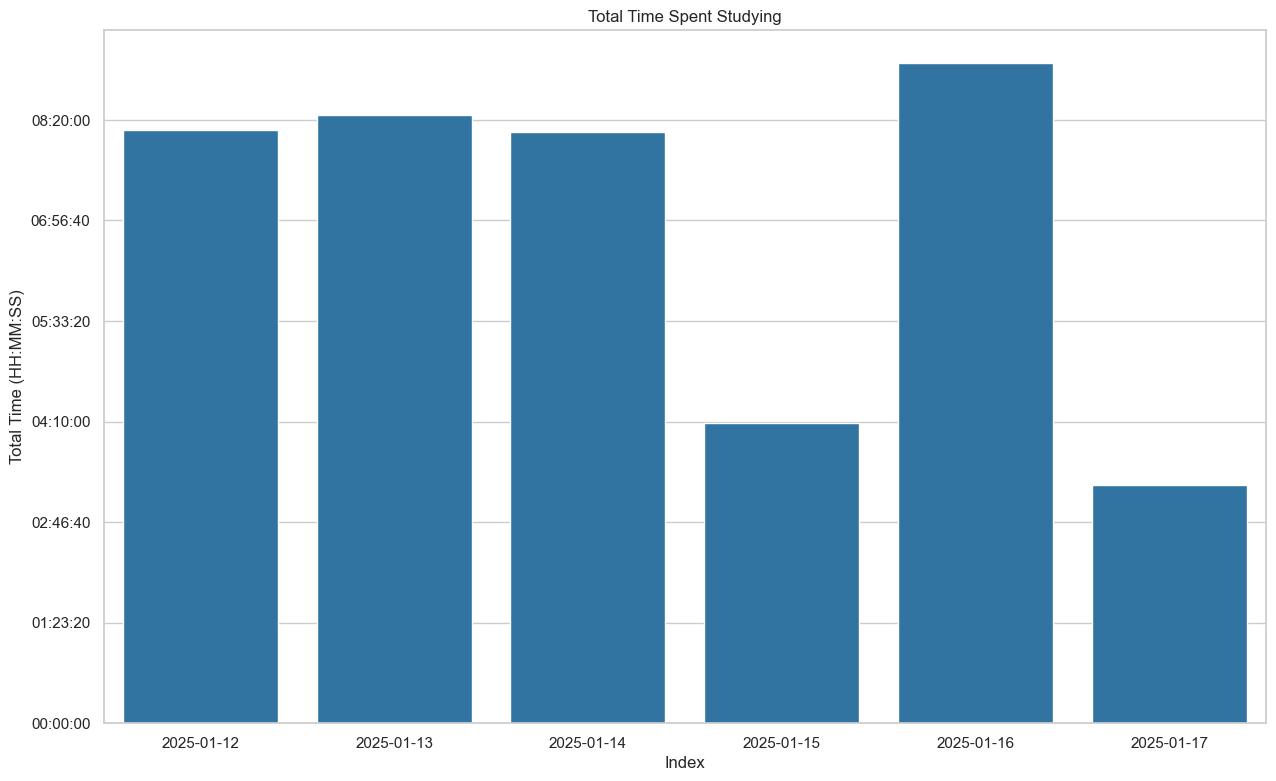

In [9]:
sns.set_context("notebook")  # You can choose 'paper', 'notebook', 'talk', or 'poster'
sns.set_style("whitegrid")


df_grouped = df_ex.groupby(["day"]).agg({"total_time": "sum"})


# Assuming df_ex is your DataFrame
df_grouped['total_time_seconds'] = df_grouped['total_time'].dt.total_seconds()

# Function to convert seconds to HH:MM:SS format
def seconds_to_hms(x, pos):
    hours, remainder = divmod(int(x), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{hours:02}:{minutes:02}:{seconds:02}'

# Create the plot
plt.figure(figsize=(15, 9))
sns.barplot(data=df_grouped, x=df_grouped.index, y="total_time_seconds")

# Format the y-axis to show time in HH:MM:SS
formatter = FuncFormatter(seconds_to_hms)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Index')
plt.ylabel('Total Time (HH:MM:SS)')
plt.title('Total Time Spent Studying')
plt.show()

In [14]:
df_ex.pivot_table(index="day", columns=["subject"], values="total_time", aggfunc="sum").fillna(pd.Timedelta(seconds=0))

NameError: name 'df_ex' is not defined